In [81]:
from PW_explorer.run_clingo import run_clingo
from PW_explorer.load_worlds import load_worlds
from PW_explorer.pwe_helper import rel_slicer
from PW_explorer.time_series import PWETimeSeriesModule
from PW_explorer.pwe_nb_helper import ASPRules
from PW_explorer.export import PWEExport
from PW_explorer.visualize import PWEVisualization

import pandas as pd

import networkx as nx
import matplotlib.pyplot as plt
from nxpd import draw
from nxpd import nxpdParams
nxpdParams['show'] = 'ipynb'
from copy import deepcopy
from collections import OrderedDict

In [2]:
%load_ext PWE_NB_Extension

In [39]:
dataValues = [['"Sun"','"big"','1'],['"Planet"','"medium"','8'],['"Moon"','"small"','2']]
clingo_rules = ['% schema data(ENDTYPE,ENDSIZE,ENDPOPULATION,COLOUR,TRANS,TYPE,SIZE,POPULATION)']

In [40]:
def makeOriginal(dataValues,colour='black'):
    clingoStart = []
    for x in dataValues:
        clingoStart.append('data('+','.join(x)+',black,"-",'+','.join(x)+').')
    return clingoStart

In [41]:
originalSetup = makeOriginal(dataValues)

In [198]:
originalSetup

['data("Sun","big",1,black,"-","Sun","big",1).',
 'data("Planet","medium",8,black,"-","Planet","medium",8).',
 'data("Moon","small",2,black,"-","Moon","small",2).']

In [6]:
ASPRules('\n'.join(originalSetup))

'data("Sun","big",1,black,"-","Sun","big",1).\ndata("Planet","medium",8,black,"-","Planet","medium",8).\ndata("Moon","small",2,black,"-","Moon","small",2).'

In [163]:
def makeSelect(dataValues,colour='orange'):
    clingoStart = ''
    variables = [chr(65+x) for x in range(len(dataValues[0]))]  # doesn't work for over 26 variables but easy to fix
    clingoStart =  []
    variString = ','.join(variables)
    for dataVal in dataValues:
        for x in range(len(variables)):
            for y in range(len(dataVal)):
                start = y
                end = y+x+1
                if end > len(variables):
                    end += -len(variables)-1
                    templistvar = variables[end:end+1]
                    templistvar.extend(variables[start:])
                    templistdataVal = dataVal[end:end+1]
                    templistdataVal.extend(dataVal[start:])
                else:
                    templistvar = variables[start:end]
                    templistdataVal = dataVal[start:end]
                listcomp = [v+'='+d+',' for v,d in zip(templistvar,templistdataVal)]
                
                newDataValues = [] # define arbitrary start values
                for i,z in enumerate(variables):
                    if z in templistvar:
                        newDataValues.append(z)
                    else:
                        newDataValues.append(chr(65+len(variables)+i))
                arbStartValues = ','.join(newDataValues)
                
                finalStringOG = "".join(listcomp)
                finalString = finalStringOG[:-1] +'.'
                finalStringOG = finalStringOG.replace('"','')
                finalStringOG = finalStringOG.replace(',','-')
                finalStringOG += '",'
                clingoStart.append('data('+variString+','+colour+',"'+finalStringOG+arbStartValues+') :- data('+variString+',_,_,_,_,_), data('+arbStartValues+',_,_,_,_,_), '+finalString) 
    return clingoStart

In [164]:
selectCommands = makeSelect(dataValues) # may contain dupliucates

In [165]:
ASPRules('\n'.join(selectCommands))

'data(A,B,C,orange,"A=Sun-",A,E,F) :- data(A,B,C,_,_,_,_,_), data(A,E,F,_,_,_,_,_), A="Sun".\ndata(A,B,C,orange,"B=big-",D,B,F) :- data(A,B,C,_,_,_,_,_), data(D,B,F,_,_,_,_,_), B="big".\ndata(A,B,C,orange,"C=1-",D,E,C) :- data(A,B,C,_,_,_,_,_), data(D,E,C,_,_,_,_,_), C=1.\ndata(A,B,C,orange,"A=Sun-B=big-",A,B,F) :- data(A,B,C,_,_,_,_,_), data(A,B,F,_,_,_,_,_), A="Sun",B="big".\ndata(A,B,C,orange,"B=big-C=1-",D,B,C) :- data(A,B,C,_,_,_,_,_), data(D,B,C,_,_,_,_,_), B="big",C=1.\ndata(A,B,C,orange,"A=Sun-C=1-",A,E,C) :- data(A,B,C,_,_,_,_,_), data(A,E,C,_,_,_,_,_), A="Sun",C=1.\ndata(A,B,C,orange,"A=Sun-B=big-C=1-",A,B,C) :- data(A,B,C,_,_,_,_,_), data(A,B,C,_,_,_,_,_), A="Sun",B="big",C=1.\ndata(A,B,C,orange,"A=Sun-B=big-C=1-",A,B,C) :- data(A,B,C,_,_,_,_,_), data(A,B,C,_,_,_,_,_), A="Sun",B="big",C=1.\ndata(A,B,C,orange,"B=big-C=1-",D,B,C) :- data(A,B,C,_,_,_,_,_), data(D,B,C,_,_,_,_,_), B="big",C=1.\ndata(A,B,C,orange,"A=Planet-",A,E,F) :- data(A,B,C,_,_,_,_,_), data(A,E,F,_,_,_,_,_), A="Planet".\ndata(A,B,C,orange,"B=medium-",D,B,F) :- data(A,B,C,_,_,_,_,_), data(D,B,F,_,_,_,_,_), B="medium".\ndata(A,B,C,orange,"C=8-",D,E,C) :- data(A,B,C,_,_,_,_,_), data(D,E,C,_,_,_,_,_), C=8.\ndata(A,B,C,orange,"A=Planet-B=medium-",A,B,F) :- data(A,B,C,_,_,_,_,_), data(A,B,F,_,_,_,_,_), A="Planet",B="medium".\ndata(A,B,C,orange,"B=medium-C=8-",D,B,C) :- data(A,B,C,_,_,_,_,_), data(D,B,C,_,_,_,_,_), B="medium",C=8.\ndata(A,B,C,orange,"A=Planet-C=8-",A,E,C) :- data(A,B,C,_,_,_,_,_), data(A,E,C,_,_,_,_,_), A="Planet",C=8.\ndata(A,B,C,orange,"A=Planet-B=medium-C=8-",A,B,C) :- data(A,B,C,_,_,_,_,_), data(A,B,C,_,_,_,_,_), A="Planet",B="medium",C=8.\ndata(A,B,C,orange,"A=Planet-B=medium-C=8-",A,B,C) :- data(A,B,C,_,_,_,_,_), data(A,B,C,_,_,_,_,_), A="Planet",B="medium",C=8.\ndata(A,B,C,orange,"B=medium-C=8-",D,B,C) :- data(A,B,C,_,_,_,_,_), data(D,B,C,_,_,_,_,_), B="medium",C=8.\ndata(A,B,C,orange,"A=Moon-",A,E,F) :- data(A,B,C,_,_,_,_,_), data(A,E,F,_,_,_,_,_), A="Moon".\ndata(A,B,C,orange,"B=small-",D,B,F) :- data(A,B,C,_,_,_,_,_), data(D,B,F,_,_,_,_,_), B="small".\ndata(A,B,C,orange,"C=2-",D,E,C) :- data(A,B,C,_,_,_,_,_), data(D,E,C,_,_,_,_,_), C=2.\ndata(A,B,C,orange,"A=Moon-B=small-",A,B,F) :- data(A,B,C,_,_,_,_,_), data(A,B,F,_,_,_,_,_), A="Moon",B="small".\ndata(A,B,C,orange,"B=small-C=2-",D,B,C) :- data(A,B,C,_,_,_,_,_), data(D,B,C,_,_,_,_,_), B="small",C=2.\ndata(A,B,C,orange,"A=Moon-C=2-",A,E,C) :- data(A,B,C,_,_,_,_,_), data(A,E,C,_,_,_,_,_), A="Moon",C=2.\ndata(A,B,C,orange,"A=Moon-B=small-C=2-",A,B,C) :- data(A,B,C,_,_,_,_,_), data(A,B,C,_,_,_,_,_), A="Moon",B="small",C=2.\ndata(A,B,C,orange,"A=Moon-B=small-C=2-",A,B,C) :- data(A,B,C,_,_,_,_,_), data(A,B,C,_,_,_,_,_), A="Moon",B="small",C=2.\ndata(A,B,C,orange,"B=small-C=2-",D,B,C) :- data(A,B,C,_,_,_,_,_), data(D,B,C,_,_,_,_,_), B="small",C=2.'

In [130]:
def makeProject(dataValues,colour='red'):
    # right now only removes one column, remove N-1 later
    clingoStart = []
    variables = [chr(65+x) for x in range(len(dataValues[0]))] # doesn't work for over 26 variables but easy to fix
    variString = ','.join(variables)
    for loop in range(len(variables)-1):
        for x in range(len(variables)):
            newVariables = [x for x in variables]
            otherNewVariables = [x for x in variables]
            start = x
            end = x + loop +1
            if end > len(variables)-1:
                end += - len(variables)
                donotRemove = [val for val in range(end,start)]
                removeKeys = [val for val in range(len(variables)) if val not in donotRemove]
                strdonotRemove = [str(val) for val in donotRemove]
                donotRemoveString = '-'.join(strdonotRemove)
            else:
                removeKeys = [val for val in range(start,end)]
                donotRemove = [str(val) for val in range(len(variables)) if val not in removeKeys]
                donotRemoveString = '-'.join(donotRemove)
            for remove in removeKeys:
                newVariables[remove] = '_'
                otherNewVariables[remove] = '"-"'
            newVariString = ','.join(newVariables)
            otherNewVariString = ','.join(otherNewVariables)
            clingoStart.append('data('+otherNewVariString+','+colour+',"Pro-Col-'+donotRemoveString+'",'+variString+') :- data('+variString+',_,_,_,_,_).') 

    return clingoStart

In [131]:
projectCommands = makeProject(dataValues)

In [132]:
ASPRules('\n'.join(projectCommands))

'data("-",B,C,red,"Pro-Col-1-2",A,B,C) :- data(A,B,C,_,_,_,_,_).\ndata(A,"-",C,red,"Pro-Col-0-2",A,B,C) :- data(A,B,C,_,_,_,_,_).\ndata(A,B,"-",red,"Pro-Col-0-1",A,B,C) :- data(A,B,C,_,_,_,_,_).\ndata("-","-",C,red,"Pro-Col-2",A,B,C) :- data(A,B,C,_,_,_,_,_).\ndata(A,"-","-",red,"Pro-Col-0",A,B,C) :- data(A,B,C,_,_,_,_,_).\ndata("-",B,"-",red,"Pro-Col-1",A,B,C) :- data(A,B,C,_,_,_,_,_).'

In [14]:
# def makeJoin(): to do
    

In [166]:
clingo_rules = ['% schema data(ENDTYPE,ENDSIZE,ENDPOPULATION,COLOUR,TRANS,TYPE,SIZE,POPULATION)']
clingo_rules.extend(originalSetup)
#clingo_rules.extend(['% schema database rules'])
clingo_rules.extend(selectCommands)
#clingo_rules.extend(['% schema project rules'])
clingo_rules.extend(projectCommands)

In [167]:
ASPRules('\n'.join(clingo_rules))

'% schema data(ENDTYPE,ENDSIZE,ENDPOPULATION,COLOUR,TRANS,TYPE,SIZE,POPULATION)\ndata("Sun","big",1,black,"-","Sun","big",1).\ndata("Planet","medium",8,black,"-","Planet","medium",8).\ndata("Moon","small",2,black,"-","Moon","small",2).\ndata(A,B,C,orange,"A=Sun-",A,E,F) :- data(A,B,C,_,_,_,_,_), data(A,E,F,_,_,_,_,_), A="Sun".\ndata(A,B,C,orange,"B=big-",D,B,F) :- data(A,B,C,_,_,_,_,_), data(D,B,F,_,_,_,_,_), B="big".\ndata(A,B,C,orange,"C=1-",D,E,C) :- data(A,B,C,_,_,_,_,_), data(D,E,C,_,_,_,_,_), C=1.\ndata(A,B,C,orange,"A=Sun-B=big-",A,B,F) :- data(A,B,C,_,_,_,_,_), data(A,B,F,_,_,_,_,_), A="Sun",B="big".\ndata(A,B,C,orange,"B=big-C=1-",D,B,C) :- data(A,B,C,_,_,_,_,_), data(D,B,C,_,_,_,_,_), B="big",C=1.\ndata(A,B,C,orange,"A=Sun-C=1-",A,E,C) :- data(A,B,C,_,_,_,_,_), data(A,E,C,_,_,_,_,_), A="Sun",C=1.\ndata(A,B,C,orange,"A=Sun-B=big-C=1-",A,B,C) :- data(A,B,C,_,_,_,_,_), data(A,B,C,_,_,_,_,_), A="Sun",B="big",C=1.\ndata(A,B,C,orange,"A=Sun-B=big-C=1-",A,B,C) :- data(A,B,C,_,_,_,_,_), data(A,B,C,_,_,_,_,_), A="Sun",B="big",C=1.\ndata(A,B,C,orange,"B=big-C=1-",D,B,C) :- data(A,B,C,_,_,_,_,_), data(D,B,C,_,_,_,_,_), B="big",C=1.\ndata(A,B,C,orange,"A=Planet-",A,E,F) :- data(A,B,C,_,_,_,_,_), data(A,E,F,_,_,_,_,_), A="Planet".\ndata(A,B,C,orange,"B=medium-",D,B,F) :- data(A,B,C,_,_,_,_,_), data(D,B,F,_,_,_,_,_), B="medium".\ndata(A,B,C,orange,"C=8-",D,E,C) :- data(A,B,C,_,_,_,_,_), data(D,E,C,_,_,_,_,_), C=8.\ndata(A,B,C,orange,"A=Planet-B=medium-",A,B,F) :- data(A,B,C,_,_,_,_,_), data(A,B,F,_,_,_,_,_), A="Planet",B="medium".\ndata(A,B,C,orange,"B=medium-C=8-",D,B,C) :- data(A,B,C,_,_,_,_,_), data(D,B,C,_,_,_,_,_), B="medium",C=8.\ndata(A,B,C,orange,"A=Planet-C=8-",A,E,C) :- data(A,B,C,_,_,_,_,_), data(A,E,C,_,_,_,_,_), A="Planet",C=8.\ndata(A,B,C,orange,"A=Planet-B=medium-C=8-",A,B,C) :- data(A,B,C,_,_,_,_,_), data(A,B,C,_,_,_,_,_), A="Planet",B="medium",C=8.\ndata(A,B,C,orange,"A=Planet-B=medium-C=8-",A,B,C) :- data(A,B,C,_,_,_,_,_), data(A,B,C,_,_,_,_,_), A="Planet",B="medium",C=8.\ndata(A,B,C,orange,"B=medium-C=8-",D,B,C) :- data(A,B,C,_,_,_,_,_), data(D,B,C,_,_,_,_,_), B="medium",C=8.\ndata(A,B,C,orange,"A=Moon-",A,E,F) :- data(A,B,C,_,_,_,_,_), data(A,E,F,_,_,_,_,_), A="Moon".\ndata(A,B,C,orange,"B=small-",D,B,F) :- data(A,B,C,_,_,_,_,_), data(D,B,F,_,_,_,_,_), B="small".\ndata(A,B,C,orange,"C=2-",D,E,C) :- data(A,B,C,_,_,_,_,_), data(D,E,C,_,_,_,_,_), C=2.\ndata(A,B,C,orange,"A=Moon-B=small-",A,B,F) :- data(A,B,C,_,_,_,_,_), data(A,B,F,_,_,_,_,_), A="Moon",B="small".\ndata(A,B,C,orange,"B=small-C=2-",D,B,C) :- data(A,B,C,_,_,_,_,_), data(D,B,C,_,_,_,_,_), B="small",C=2.\ndata(A,B,C,orange,"A=Moon-C=2-",A,E,C) :- data(A,B,C,_,_,_,_,_), data(A,E,C,_,_,_,_,_), A="Moon",C=2.\ndata(A,B,C,orange,"A=Moon-B=small-C=2-",A,B,C) :- data(A,B,C,_,_,_,_,_), data(A,B,C,_,_,_,_,_), A="Moon",B="small",C=2.\ndata(A,B,C,orange,"A=Moon-B=small-C=2-",A,B,C) :- data(A,B,C,_,_,_,_,_), data(A,B,C,_,_,_,_,_), A="Moon",B="small",C=2.\ndata(A,B,C,orange,"B=small-C=2-",D,B,C) :- data(A,B,C,_,_,_,_,_), data(D,B,C,_,_,_,_,_), B="small",C=2.\ndata("-",B,C,red,"Pro-Col-1-2",A,B,C) :- data(A,B,C,_,_,_,_,_).\ndata(A,"-",C,red,"Pro-Col-0-2",A,B,C) :- data(A,B,C,_,_,_,_,_).\ndata(A,B,"-",red,"Pro-Col-0-1",A,B,C) :- data(A,B,C,_,_,_,_,_).\ndata("-","-",C,red,"Pro-Col-2",A,B,C) :- data(A,B,C,_,_,_,_,_).\ndata(A,"-","-",red,"Pro-Col-0",A,B,C) :- data(A,B,C,_,_,_,_,_).\ndata("-",B,"-",red,"Pro-Col-1",A,B,C) :- data(A,B,C,_,_,_,_,_).'

In [135]:
clingo_rules

['% schema data(ENDTYPE,ENDSIZE,ENDPOPULATION,COLOUR,TRANS,TYPE,SIZE,POPULATION)',
 'data("Sun","big",1,black,"-","Sun","big",1).',
 'data("Planet","medium",8,black,"-","Planet","medium",8).',
 'data("Moon","small",2,black,"-","Moon","small",2).',
 'data(A,B,C,orange,"A=Sun-",A,B,_) :- data(A,B,C,_,_,_,_,_), A="Sun".',
 'data(A,B,C,orange,"B=big-",A,B,_) :- data(A,B,C,_,_,_,_,_), B="big".',
 'data(A,B,C,orange,"C=1-",A,B,_) :- data(A,B,C,_,_,_,_,_), C=1.',
 'data(A,B,C,orange,"A=Sun-B=big-",A,B,_) :- data(A,B,C,_,_,_,_,_), A="Sun",B="big".',
 'data(A,B,C,orange,"B=big-C=1-",A,B,_) :- data(A,B,C,_,_,_,_,_), B="big",C=1.',
 'data(A,B,C,orange,"A=Sun-C=1-",A,B,_) :- data(A,B,C,_,_,_,_,_), A="Sun",C=1.',
 'data(A,B,C,orange,"A=Sun-B=big-C=1-",A,B,_) :- data(A,B,C,_,_,_,_,_), A="Sun",B="big",C=1.',
 'data(A,B,C,orange,"A=Sun-B=big-C=1-",A,B,_) :- data(A,B,C,_,_,_,_,_), A="Sun",B="big",C=1.',
 'data(A,B,C,orange,"B=big-C=1-",A,B,_) :- data(A,B,C,_,_,_,_,_), B="big",C=1.',
 'data(A,B,C,orange

In [168]:
%clingo -l clingo_rules --saveto clingo_soln --save_meta_data_to meta_data --donot-display_input

Output:


'Answer: 1\ndata("Sun","big",1,black,"-","Sun","big",1) data("Planet","medium",8,black,"-","Planet","medium",8) data("Moon","small",2,black,"-","Moon","small",2) data("-","small","-",red,"Pro-Col-1","Moon","small",2) data("-","medium","-",red,"Pro-Col-1","Planet","medium",8) data("-","big","-",red,"Pro-Col-1","Sun","big",1) data("Moon","-","-",red,"Pro-Col-0","Moon","small",2) data("Planet","-","-",red,"Pro-Col-0","Planet","medium",8) data("Sun","-","-",red,"Pro-Col-0","Sun","big",1) data("-","-",2,red,"Pro-Col-2","Moon","small",2) data("-","-",8,red,"Pro-Col-2","Planet","medium",8) data("-","-",1,red,"Pro-Col-2","Sun","big",1) data("Moon","small","-",red,"Pro-Col-0-1","Moon","small",2) data("Planet","medium","-",red,"Pro-Col-0-1","Planet","medium",8) data("Sun","big","-",red,"Pro-Col-0-1","Sun","big",1) data("Moon","-",2,red,"Pro-Col-0-2","Moon","small",2) data("Planet","-",8,red,"Pro-Col-0-2","Planet","medium",8) data("Sun","-",1,red,"Pro-Col-0-2","Sun","big",1) data("-","small",2,red,"Pro-Col-1-2","Moon","small",2) data("-","medium",8,red,"Pro-Col-1-2","Planet","medium",8) data("-","big",1,red,"Pro-Col-1-2","Sun","big",1) data("-","big","-",red,"Pro-Col-1","-","big",1) data("-","medium","-",red,"Pro-Col-1","-","medium",8) data("-","small","-",red,"Pro-Col-1","-","small",2) data("-","-","-",red,"Pro-Col-1","Sun","-",1) data("-","-","-",red,"Pro-Col-1","Planet","-",8) data("-","-","-",red,"Pro-Col-1","Moon","-",2) data("-","big","-",red,"Pro-Col-1","Sun","big","-") data("-","medium","-",red,"Pro-Col-1","Planet","medium","-") data("-","small","-",red,"Pro-Col-1","Moon","small","-") data("-","-","-",red,"Pro-Col-1","-","-",1) data("-","-","-",red,"Pro-Col-1","-","-",8) data("-","-","-",red,"Pro-Col-1","-","-",2) data("-","-","-",red,"Pro-Col-1","Sun","-","-") data("-","-","-",red,"Pro-Col-1","Planet","-","-") data("-","-","-",red,"Pro-Col-1","Moon","-","-") data("-","big","-",red,"Pro-Col-1","-","big","-") data("-","medium","-",red,"Pro-Col-1","-","medium","-") data("-","small","-",red,"Pro-Col-1","-","small","-") data("-","-","-",red,"Pro-Col-0","-","big",1) data("-","-","-",red,"Pro-Col-0","-","medium",8) data("-","-","-",red,"Pro-Col-0","-","small",2) data("Sun","-","-",red,"Pro-Col-0","Sun","-",1) data("Planet","-","-",red,"Pro-Col-0","Planet","-",8) data("Moon","-","-",red,"Pro-Col-0","Moon","-",2) data("Sun","-","-",red,"Pro-Col-0","Sun","big","-") data("Planet","-","-",red,"Pro-Col-0","Planet","medium","-") data("Moon","-","-",red,"Pro-Col-0","Moon","small","-") data("-","-","-",red,"Pro-Col-0","-","-",1) data("-","-","-",red,"Pro-Col-0","-","-",8) data("-","-","-",red,"Pro-Col-0","-","-",2) data("Sun","-","-",red,"Pro-Col-0","Sun","-","-") data("Planet","-","-",red,"Pro-Col-0","Planet","-","-") data("Moon","-","-",red,"Pro-Col-0","Moon","-","-") data("-","-","-",red,"Pro-Col-0","-","big","-") data("-","-","-",red,"Pro-Col-0","-","medium","-") data("-","-","-",red,"Pro-Col-0","-","small","-") data("-","-",1,red,"Pro-Col-2","-","big",1) data("-","-",8,red,"Pro-Col-2","-","medium",8) data("-","-",2,red,"Pro-Col-2","-","small",2) data("-","-",1,red,"Pro-Col-2","Sun","-",1) data("-","-",8,red,"Pro-Col-2","Planet","-",8) data("-","-",2,red,"Pro-Col-2","Moon","-",2) data("-","-","-",red,"Pro-Col-2","Sun","big","-") data("-","-","-",red,"Pro-Col-2","Planet","medium","-") data("-","-","-",red,"Pro-Col-2","Moon","small","-") data("-","-",1,red,"Pro-Col-2","-","-",1) data("-","-",8,red,"Pro-Col-2","-","-",8) data("-","-",2,red,"Pro-Col-2","-","-",2) data("-","-","-",red,"Pro-Col-2","Sun","-","-") data("-","-","-",red,"Pro-Col-2","Planet","-","-") data("-","-","-",red,"Pro-Col-2","Moon","-","-") data("-","-","-",red,"Pro-Col-2","-","big","-") data("-","-","-",red,"Pro-Col-2","-","medium","-") data("-","-","-",red,"Pro-Col-2","-","small","-") data("-","big","-",red,"Pro-Col-0-1","-","big",1) data("-","medium","-",red,"Pro-Col-0-1","-","medium",8) data("-","small","-",red,"Pro-Col-0-1","-","small",2) data("Sun","-","-",red,"Pro-Col-0

In [169]:
pw_rels_dfs, rel_schemas, pw_objs = load_worlds(asp_output=clingo_soln, meta_data=meta_data, reasoner='clingo')

Number of Models: 1


In [170]:
pw_rels_dfs.keys()

dict_keys(['data_8'])

In [171]:
pw_rels_dfs['data_8']

,pw,ENDTYPE,ENDSIZE,ENDPOPULATION,COLOUR,TRANS,TYPE,SIZE,POPULATION
0,1,"""Sun""","""big""",1,black,"""-""","""Sun""","""big""",1
1,1,"""Planet""","""medium""",8,black,"""-""","""Planet""","""medium""",8
2,1,"""Moon""","""small""",2,black,"""-""","""Moon""","""small""",2
3,1,"""-""","""small""","""-""",red,"""Pro-Col-1""","""Moon""","""small""",2
4,1,"""-""","""medium""","""-""",red,"""Pro-Col-1""","""Planet""","""medium""",8
...,...,...,...,...,...,...,...,...,...
313,1,"""Sun""","""big""","""-""",orange,"""A=Sun-""","""Sun""","""-""","""-"""
314,1,"""Sun""","""-""","""-""",orange,"""A=Sun-""","""Sun""","""-""","""-"""
315,1,"""Sun""","""-""",1,orange,"""A=Sun-""","""Sun""","""big""",1
316,1,"""Sun""","""big""","""-""",orange,"""A=Sun-""","""Sun""","""big""",1


In [172]:
edge_rel_name = 'data_8'

In [173]:
edge_init_col_names = ['TYPE', 'SIZE', 'POPULATION', 'COLOUR']

In [193]:
# G = nx.Graph()

# edges = []
# start_col_names = ['TYPE','SIZE','POPULATION']
# end_col_names = ['ENDTYPE','ENDSIZE','ENDPOPULATION']

# startList = []
# endList = []

# for color in ['black','orange','red','none']:
#     for i, row in pw_rels_dfs[edge_rel_name].iterrows():
#         if row['COLOUR'] != color:
#             start_node = '('+"{}".format(','.join([row[col] for col in start_col_names]))+')'
#             end_node = '('+"{}".format(','.join([row[col] for col in end_col_names]))+')'
#             startList.append(start_node)
#             endList.append(end_node)
#             G.add_edge(start_node, end_node, penwidth=2,color=row['COLOUR'])
#             edges.append((start_node, end_node))
#     for node in G.nodes: G.nodes[node]['fontname'] = 'Helvetica'
#     #G.graph['layout'] = 'fdp'
    
#     draw(G)
    
# # G.graph['rankdir'] = 'TB'

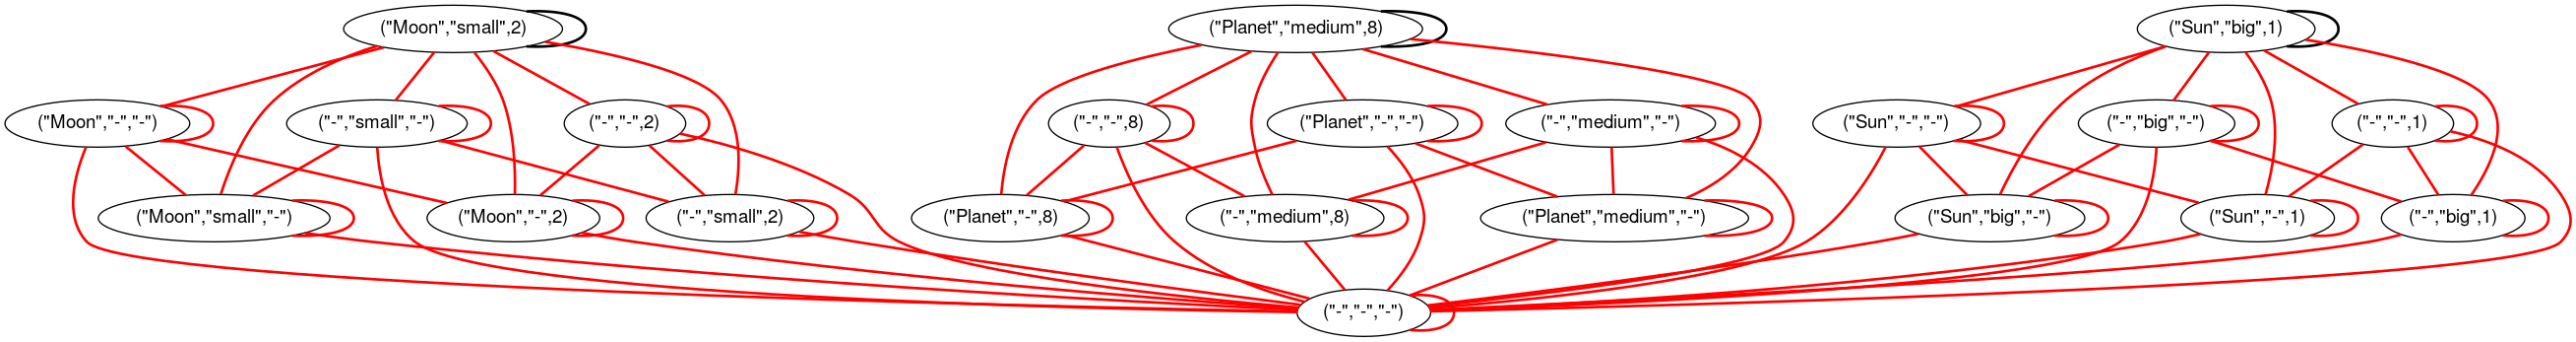

In [194]:
G = nx.Graph()

edges = []
start_col_names = ['TYPE','SIZE','POPULATION']
end_col_names = ['ENDTYPE','ENDSIZE','ENDPOPULATION']

startList = []
endList = []

for color in ['orange']:
    for i, row in pw_rels_dfs[edge_rel_name].iterrows():
        if row['COLOUR'] != color:
            start_node = '('+"{}".format(','.join([row[col] for col in start_col_names]))+')'
            end_node = '('+"{}".format(','.join([row[col] for col in end_col_names]))+')'
            startList.append(start_node)
            endList.append(end_node)
            G.add_edge(start_node, end_node, penwidth=2,color=row['COLOUR'])
            edges.append((start_node, end_node))
    for node in G.nodes: G.nodes[node]['fontname'] = 'Helvetica'
    #G.graph['layout'] = 'fdp'
    
draw(G)
    
# G.graph['rankdir'] = 'TB'

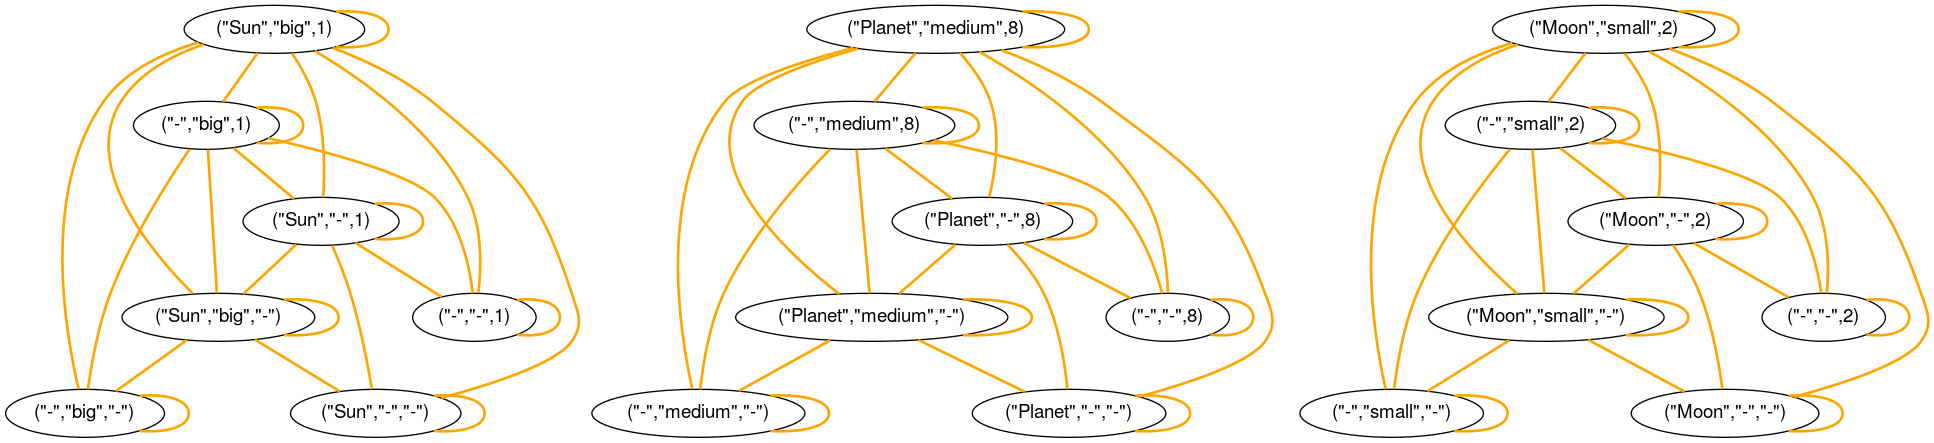

In [195]:
G = nx.Graph()

edges = []
start_col_names = ['TYPE','SIZE','POPULATION']
end_col_names = ['ENDTYPE','ENDSIZE','ENDPOPULATION']

startList = []
endList = []

for color in ['red']:
    for i, row in pw_rels_dfs[edge_rel_name].iterrows():
        if row['COLOUR'] != color:
            start_node = '('+"{}".format(','.join([row[col] for col in start_col_names]))+')'
            end_node = '('+"{}".format(','.join([row[col] for col in end_col_names]))+')'
            startList.append(start_node)
            endList.append(end_node)
            G.add_edge(start_node, end_node, penwidth=2,color=row['COLOUR'])
            edges.append((start_node, end_node))
    for node in G.nodes: G.nodes[node]['fontname'] = 'Helvetica'
    #G.graph['layout'] = 'fdp'
    
draw(G)
    
# G.graph['rankdir'] = 'TB'

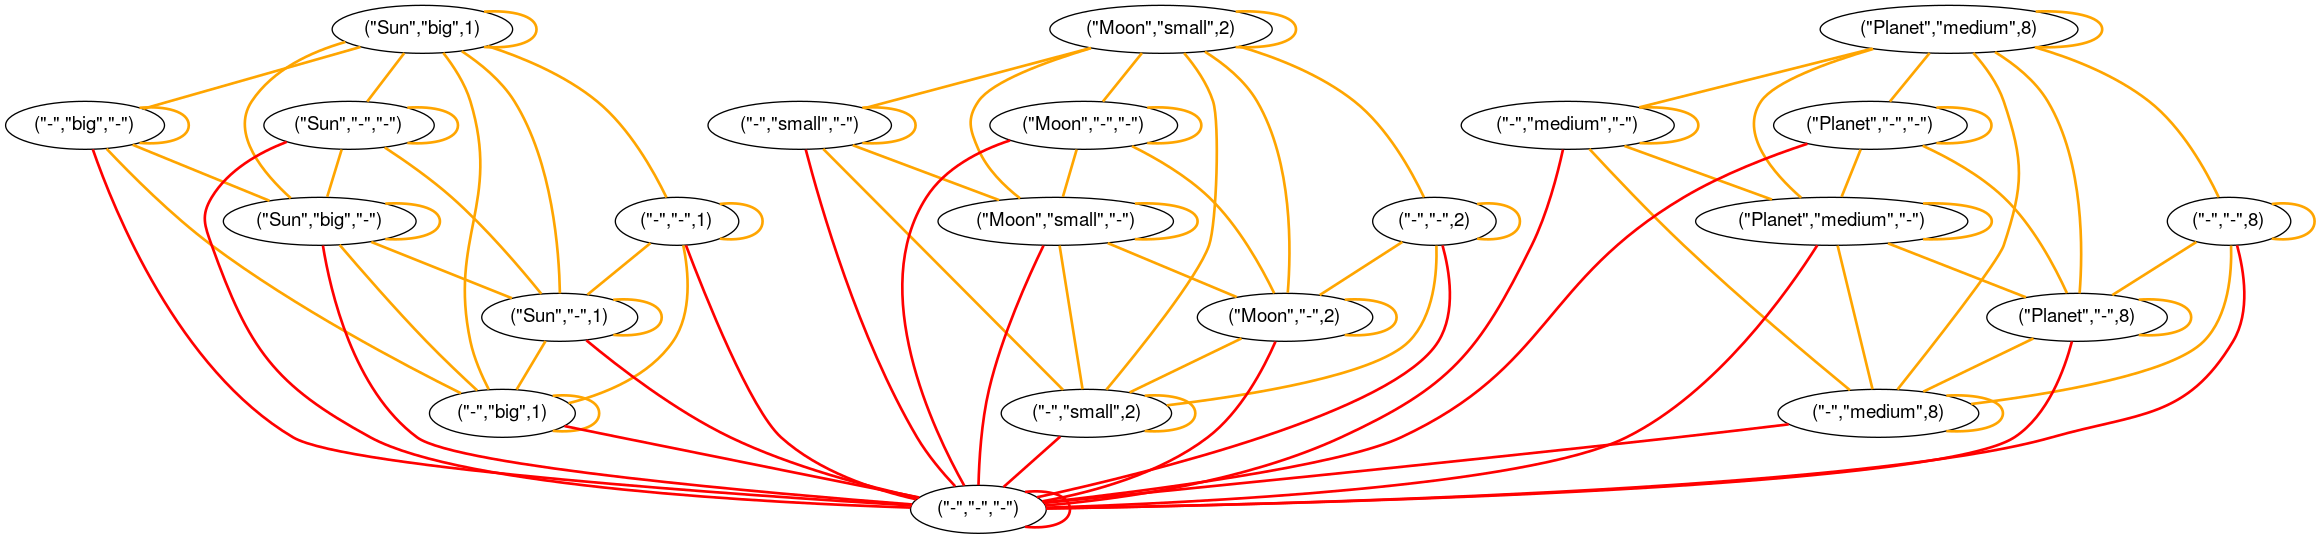

In [196]:
G = nx.Graph()

edges = []
start_col_names = ['TYPE','SIZE','POPULATION']
end_col_names = ['ENDTYPE','ENDSIZE','ENDPOPULATION']

startList = []
endList = []

for i, row in pw_rels_dfs[edge_rel_name].iterrows():
    start_node = '('+"{}".format(','.join([row[col] for col in start_col_names]))+')'
    end_node = '('+"{}".format(','.join([row[col] for col in end_col_names]))+')'
    startList.append(start_node)
    endList.append(end_node)
    G.add_edge(start_node, end_node, penwidth=2,color=row['COLOUR'])
    edges.append((start_node, end_node))
for node in G.nodes: G.nodes[node]['fontname'] = 'Helvetica'
#G.graph['layout'] = 'fdp'

draw(G)
    
# G.graph['rankdir'] = 'TB'

In [176]:
rowNum = 10
target = [pw_rels_dfs[edge_rel_name][colname][rowNum] for colname in end_col_names]
target = '('+','.join(target)+')'

In [177]:
target

'("-","-",8)'

In [178]:
dataValuesNonStr = ['("Sun","big",1)','("Planet","medium",8)','("Moon","small",2)']


allPaths = []
for sources in dataValuesNonStr:
    singlePath = []
    for path in nx.all_simple_paths(G,source=sources,target=target):
        singlePath.append(path)
    allPaths.append(singlePath)

In [179]:
len(allPaths[0])

67044